In [1]:
import logging

import pandas as pd
import numpy as np

from copairs.map import run_pipeline, aggregate

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
logging.basicConfig(format='%(levelname)s:%(asctime)s:%(name)s:%(message)s')
logging.getLogger("copairs").setLevel(logging.INFO)

In [3]:
subset_corrected = pd.read_parquet("../3.correct/output/subset_profiles_cc_corrected.parquet")
subset_corrected.reset_index(inplace=True, drop=True)
subset_corrected

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,Nuclei_Texture_InfoMeas1_AGP_5_01_256,Nuclei_Texture_InfoMeas1_AGP_5_02_256,Nuclei_Texture_InfoMeas1_DNA_3_00_256,Nuclei_Texture_InfoMeas1_ER_3_00_256,Nuclei_Texture_InfoMeas1_Mito_3_03_256,Nuclei_Texture_InfoMeas1_Mito_5_03_256,Nuclei_Texture_InfoMeas1_RNA_3_00_256,Nuclei_Texture_InfoMeas2_AGP_3_00_256,Nuclei_Texture_InfoMeas2_ER_3_00_256,Nuclei_Texture_InfoMeas2_Mito_3_00_256
0,JCP2022_900006,ccsbBroad304_00008,ORF000425.1_TRC304.1,pLX_304,NM_001095.4,ASIC1,41,9606,acid sensing ion channel subunit 1,100.0,...,0.843520,0.076629,0.320495,-0.385691,0.190393,0.455439,0.509989,-1.019058,-0.728018,-0.842900
1,JCP2022_900176,ccsbBroad304_00189,ORF011559.1_TRC304.1,pLX_304,NM_000587.4,C7,730,9606,complement C7,100.0,...,-0.553290,-1.089465,-0.339287,-1.516528,-0.441853,-0.130403,-0.575900,0.593813,0.509472,-0.214630
2,JCP2022_900198,ccsbBroad304_00212,ORF000189.1_TRC304.1,pLX_304,NM_001745.4,CAMLG,819,9606,calcium modulating ligand,100.0,...,-0.234758,-0.754398,0.077711,-0.322006,0.405521,0.628356,0.367091,0.264900,-0.726229,-0.754226
3,JCP2022_900294,ccsbBroad304_00321,ORF012872.1_TRC304.1,pLX_304,NM_001830.4,CLCN4,1183,9606,chloride voltage-gated channel 4,100.0,...,0.015575,-0.494212,-0.287738,-0.628006,-0.710360,-0.637044,-0.199234,-0.135215,-0.290255,0.329603
4,JCP2022_900295,ccsbBroad304_00322,ORF012041.1_TRC304.1,pLX_304,NM_000084.5,CLCN5,1184,9606,chloride voltage-gated channel 5,100.0,...,-0.037950,-0.722263,-0.448482,-1.166396,-1.939791,-1.753126,-0.387831,-0.074344,0.047114,1.303154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,JCP2022_915130,ccsbBroad304_99991,ORFC00003.1_TRC304.1,pLX_304,promegaLuc.1,LUCIFERASE,LUCIFERASE,CONTROL,promegaLuc,100.0,...,-2.711637,-3.969020,-0.809173,-2.974404,-2.787182,-0.704466,0.198940,2.073704,0.223352,-0.531671
19139,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-2.077464,-3.094050,-0.711135,-2.103393,-1.919127,-0.485729,0.300176,1.795613,-0.029494,-0.503798
19140,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-2.488416,-3.648240,-0.653903,-2.628677,-2.837781,-0.915236,0.115573,2.372484,0.350838,0.082462
19141,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-2.967861,-4.202986,-0.806160,-2.797058,-2.398970,-0.965612,0.605841,2.384358,0.194635,0.017635


In [4]:
# subset_corrected["Metadata_dummy_index"] = subset_corrected.index
# subset_corrected.loc[subset_corrected["Metadata_pert_type"] == "trt", "Metadata_dummy_index"] = -1

In [5]:
metadata = subset_corrected.filter(regex="^Metadata_")
feature_values = subset_corrected.filter(regex="^(?!Metadata_)").values

In [6]:
metadata.loc[13889, :]

Metadata_JCP2022                            JCP2022_900041
Metadata_broad_sample                   ccsbBroad304_00047
Metadata_Name                         ORF007322.1_TRC304.1
Metadata_Vector                                    pLX_304
Metadata_Transcript                            NM_001626.6
Metadata_Symbol                                       AKT2
Metadata_NCBI_Gene_ID                                  208
Metadata_Taxon_ID                                     9606
Metadata_Gene_Description    AKT serine/threonine kinase 2
Metadata_Prot_Match                                   58.7
Metadata_Insert_Length                              1450.0
Metadata_pert_type                                     trt
Metadata_Source_x                                 source_4
Metadata_Plate                                  BR00124769
Metadata_Well                                          F08
Metadata_plate_map_name                   OKA05.06.07.08.A
Metadata_Source_y                                 source

In [7]:
metadata[metadata.Metadata_JCP2022 == "JCP2022_900041"]

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_pert_type,Metadata_Source_x,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_Source_y
3553,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124787,H13,OAA85.86.87.88.A,source_4
3913,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124788,H13,OAA85.86.87.88.A,source_4
4273,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125619,H13,OAA85.86.87.88.A,source_4
4632,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125620,H13,OAA85.86.87.88.A,source_4
4992,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125621,H13,OAA85.86.87.88.A,source_4
12473,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00123945,F08,OKA05.06.07.08.A,source_4
12827,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124766,F08,OKA05.06.07.08.A,source_4
13181,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124767,F08,OKA05.06.07.08.A,source_4
13535,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124768,F08,OKA05.06.07.08.A,source_4
13889,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124769,F08,OKA05.06.07.08.A,source_4


In [8]:
# pos_sameby = ["Metadata_Well", "Metadata_dummy_index"]
# pos_diffby = ["Metadata_JCP2022"]

# neg_sameby = ["Metadata_Vector"]
# neg_diffby = ["Metadata_pert_type"]

# null_size = 10000

In [9]:
pos_sameby = ["Metadata_JCP2022"]
pos_diffby = ["Metadata_Well"]

neg_sameby = []
neg_diffby = ["Metadata_pert_type"]

null_size = 10000

In [50]:
result = run_pipeline(
    metadata,
    feature_values, 
    pos_sameby,
    pos_diffby,
    neg_sameby,
    neg_diffby,
    null_size,
    batch_size=100000
)

INFO:2023-05-24 16:16:42,755:copairs:Indexing metadata...
INFO:2023-05-24 16:16:42,776:copairs:Finding positive pairs...
INFO:2023-05-24 16:16:42,809:copairs:dropping dups...
INFO:2023-05-24 16:16:43,017:copairs:Finding negative pairs...
INFO:2023-05-24 16:16:49,358:copairs:dropping dups...
INFO:2023-05-24 16:17:28,560:copairs:Computing positive similarities...


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:2023-05-24 16:17:29,692:copairs:Computing negative similarities...


  0%|          | 0/161 [00:00<?, ?it/s]

INFO:2023-05-24 16:21:28,696:copairs:Building rank lists...
INFO:2023-05-24 16:21:47,711:copairs:Computing average precision...
INFO:2023-05-24 16:21:47,978:copairs:Computing null distributions...
/Users/akalinin/Projects/copairs/src/copairs/compute_np.py:107: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos
/Users/akalinin/Projects/copairs/src/copairs/compute_np.py:107: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos
/Users/akalinin/Projects/copairs/src/copairs/compute_np.py:107: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos
/Users/akalinin/Projects/copairs/src/copairs/compute_np.py:107: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos
INFO:2023-05-24 16:22:09,570:copairs:Computing P-values...
INFO:2023-05-24 16:22:09,665:copairs:Creating result DataFrame...
INFO:2023-05-24 16:22:09,671:copairs:F

In [63]:
print(result[(result["Metadata_JCP2022"]=="JCP2022_900041") & (result["Metadata_Well"]=="H13")]["average_precision"].mean())
result[(result["Metadata_JCP2022"]=="JCP2022_900041") & (result["Metadata_Well"]=="H13")]

0.010317452215444911


,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_pert_type,Metadata_Source_x,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_Source_y,p_value,average_precision,package
3553,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124787,H13,OAA85.86.87.88.A,source_4,0.111415,0.005813,copairs
3913,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124788,H13,OAA85.86.87.88.A,source_4,0.061824,0.005192,copairs
4273,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125619,H13,OAA85.86.87.88.A,source_4,0.215284,0.006970,copairs
4632,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125620,H13,OAA85.86.87.88.A,source_4,0.459964,0.009922,copairs
4992,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125621,H13,OAA85.86.87.88.A,source_4,1.096953,0.023691,copairs


In [52]:
print(result[(result["Metadata_JCP2022"]=="JCP2022_900041") & (result["Metadata_Well"]=="F08")]["average_precision"].mean())
result[(result["Metadata_JCP2022"]=="JCP2022_900041") & (result["Metadata_Well"]=="F08")]

0.00584705172825521


,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_pert_type,Metadata_Source_x,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_Source_y,p_value,average_precision
12473,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00123945,F08,OKA05.06.07.08.A,source_4,0.821718,0.005499
12827,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124766,F08,OKA05.06.07.08.A,source_4,0.438256,0.008563
13181,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124767,F08,OKA05.06.07.08.A,source_4,0.882512,0.005106
13535,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124768,F08,OKA05.06.07.08.A,source_4,0.927107,0.004783
13889,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124769,F08,OKA05.06.07.08.A,source_4,0.856314,0.005285


In [53]:
agg_result = aggregate(result, sameby=pos_sameby, threshold=0.05)
agg_result

,Metadata_JCP2022,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold
0,JCP2022_900006,NaN,4.000043,0.000101,3.995097,True,True
1,JCP2022_900008,NaN,4.000043,0.000101,3.995097,True,True
2,JCP2022_900012,NaN,4.000043,0.000101,3.995097,True,True
3,JCP2022_900014,NaN,4.000043,0.000101,3.995097,True,True
4,JCP2022_900015,NaN,4.000043,0.000101,3.995097,True,True
...,...,...,...,...,...,...,...
3615,JCP2022_915127,NaN,4.000043,0.000101,3.995097,True,True
3616,JCP2022_915128,0.012113,0.448477,0.358436,0.445588,False,False
3617,JCP2022_915129,0.012221,0.454072,0.353946,0.451063,False,False
3618,JCP2022_915130,0.011992,0.370014,0.428817,0.367728,False,False


In [54]:
agg_result_trt = agg_result[~agg_result.average_precision.isnull()]
agg_result_trt

,Metadata_JCP2022,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold
12,JCP2022_900041,0.008082,0.254351,0.558124,0.253269,False,False
58,JCP2022_900288,0.015656,0.732698,0.186862,0.728479,False,False
108,JCP2022_900475,0.008550,0.310974,0.490443,0.309411,False,False
164,JCP2022_900832,0.008710,0.351718,0.447019,0.349674,False,False
221,JCP2022_901127,0.007630,0.189895,0.646704,0.189294,False,False
700,JCP2022_903189,0.009411,0.370420,0.428535,0.368014,False,False
1084,JCP2022_904840,0.007439,0.256285,0.555798,0.255083,False,False
1189,JCP2022_905399,0.021413,0.711900,0.195974,0.707802,False,False
1272,JCP2022_905771,0.013723,0.376393,0.422799,0.373866,False,False
1420,JCP2022_906380,0.014000,0.535108,0.293944,0.531736,False,False


In [15]:
# agg_result_trt = agg_result[agg_result.Metadata_dummy_index==-1]
# agg_result_trt.loc[:, "package"] = "copairs"
# agg_result_trt


In [16]:
p_value = agg_result_trt['above_p_threshold']
print(
    f"mmAP: {agg_result_trt.average_precision.mean():.03}",
    f"p<0.05: {p_value.mean():.03} ({p_value.sum()}/{p_value.shape[0]})",
    )

mmAP: 0.0194 p<0.05: 0.0244 (1/41)


In [17]:
# evalzoo_l1 = pd.read_parquet("../2.evalzoo/results/d2311b58/metrics_level_1_ref.parquet")
evalzoo_l1 = pd.read_parquet("../2.evalzoo/results/f5c36cb4/metrics_level_1_ref.parquet")
# evalzoo_l1.drop_duplicates(subset="Metadata_JCP2022", inplace=True)
evalzoo_l1

,Metadata_JCP2022,Metadata_reference_or_other,Metadata_Well,sim_scaled_mean_ref_i_mean_i,sim_scaled_mean_ref_i_median_i,sim_scaled_median_ref_i_mean_i,sim_scaled_median_ref_i_median_i,sim_ranked_relrank_mean_ref_i_mean_i,sim_ranked_relrank_mean_ref_i_median_i,sim_ranked_relrank_median_ref_i_mean_i,...,sim_stat_signal_n_ref_i_median_i,sim_stat_background_n_ref_i_mean_i,sim_stat_background_n_ref_i_median_i,sim_retrieval_average_precision_ref_i_mean_i,sim_retrieval_average_precision_ref_i_median_i,sim_retrieval_r_precision_ref_i_mean_i,sim_retrieval_r_precision_ref_i_median_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_mean_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_median_i,sim_retrieval_average_precision_ref_i_nlog10qvalue_mean_i
0,JCP2022_900041,pert,H13,0.090178,0.090112,0.090512,0.090448,0.460795,0.489091,0.465455,...,5.0,880.0,880.0,0.012836,0.007702,0.00,0.0,0.449495,0.277595,0.176117
1,JCP2022_900041,pert,F08,0.090178,0.090112,0.090512,0.090448,0.460795,0.489091,0.465455,...,5.0,880.0,880.0,0.012836,0.007702,0.00,0.0,0.449495,0.277595,0.176117
2,JCP2022_900288,pert,P06,0.090964,0.090944,0.091083,0.091075,0.210250,0.227727,0.126136,...,5.0,880.0,880.0,0.036216,0.030289,0.02,0.0,1.219742,1.260242,0.176117
3,JCP2022_900288,pert,G21,0.090964,0.090944,0.091083,0.091075,0.210250,0.227727,0.126136,...,5.0,880.0,880.0,0.036216,0.030289,0.02,0.0,1.219742,1.260242,0.176117
4,JCP2022_900475,pert,L13,0.087685,0.087482,0.088532,0.088348,0.540091,0.580114,0.555114,...,5.0,880.0,880.0,0.010808,0.007229,0.00,0.0,0.400377,0.259010,0.176117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,JCP2022_912981,pert,F06,0.085266,0.085100,0.085712,0.085703,0.565159,0.577727,0.548295,...,5.0,880.0,880.0,0.012331,0.007861,0.00,0.0,0.421629,0.305631,0.176117
70,JCP2022_912995,pert,H12,0.090769,0.090766,0.090812,0.090807,0.356477,0.366023,0.351250,...,5.0,880.0,880.0,0.024414,0.017824,0.00,0.0,0.754787,0.672187,0.176117
71,JCP2022_912995,pert,E14,0.090769,0.090766,0.090812,0.090807,0.356477,0.366023,0.351250,...,5.0,880.0,880.0,0.024414,0.017824,0.00,0.0,0.754787,0.672187,0.176117
72,JCP2022_914534,pert,B09,0.090825,0.090808,0.090910,0.090907,0.391068,0.398750,0.349886,...,5.0,880.0,880.0,0.011700,0.009898,0.00,0.0,0.496593,0.421085,0.176117


### Copairs include mAP for controls

In [18]:
subset_corrected[subset_corrected["Metadata_JCP2022"] == "JCP2022_915131"]

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,Nuclei_Texture_InfoMeas1_AGP_5_01_256,Nuclei_Texture_InfoMeas1_AGP_5_02_256,Nuclei_Texture_InfoMeas1_DNA_3_00_256,Nuclei_Texture_InfoMeas1_ER_3_00_256,Nuclei_Texture_InfoMeas1_Mito_3_03_256,Nuclei_Texture_InfoMeas1_Mito_5_03_256,Nuclei_Texture_InfoMeas1_RNA_3_00_256,Nuclei_Texture_InfoMeas2_AGP_3_00_256,Nuclei_Texture_InfoMeas2_ER_3_00_256,Nuclei_Texture_InfoMeas2_Mito_3_00_256
353,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,0.588079,-0.032079,0.413151,-0.350966,0.153687,0.656083,0.515067,-0.635082,-0.709624,-0.695249
354,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,0.186723,-0.212473,0.454330,-0.365661,-0.481106,-0.220404,0.331990,-0.357197,-0.449396,-0.133724
355,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-0.025865,-0.330361,0.074814,-0.573540,-0.868732,-0.334392,-0.649475,0.101010,0.364231,0.382007
356,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-0.154465,-0.063495,0.754239,-0.147704,0.541314,0.552429,-0.518174,0.259101,-0.047067,-0.624945
710,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,0.196716,-0.177469,-0.126727,-0.494435,-0.409704,-0.547602,0.597110,-0.662041,-0.478458,0.619552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18787,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,1.166423,-1.484327,-1.037600,-3.795082,-4.085016,-1.824469,-0.112420,-1.251850,0.284002,0.945791
19139,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-2.077464,-3.094050,-0.711135,-2.103393,-1.919127,-0.485729,0.300176,1.795613,-0.029494,-0.503798
19140,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-2.488416,-3.648240,-0.653903,-2.628677,-2.837781,-0.915236,0.115573,2.372484,0.350838,0.082462
19141,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-2.967861,-4.202986,-0.806160,-2.797058,-2.398970,-0.965612,0.605841,2.384358,0.194635,0.017635


In [19]:
evalzoo_l1[evalzoo_l1.Metadata_JCP2022 == "JCP2022_900041"]

,Metadata_JCP2022,Metadata_reference_or_other,Metadata_Well,sim_scaled_mean_ref_i_mean_i,sim_scaled_mean_ref_i_median_i,sim_scaled_median_ref_i_mean_i,sim_scaled_median_ref_i_median_i,sim_ranked_relrank_mean_ref_i_mean_i,sim_ranked_relrank_mean_ref_i_median_i,sim_ranked_relrank_median_ref_i_mean_i,...,sim_stat_signal_n_ref_i_median_i,sim_stat_background_n_ref_i_mean_i,sim_stat_background_n_ref_i_median_i,sim_retrieval_average_precision_ref_i_mean_i,sim_retrieval_average_precision_ref_i_median_i,sim_retrieval_r_precision_ref_i_mean_i,sim_retrieval_r_precision_ref_i_median_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_mean_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_median_i,sim_retrieval_average_precision_ref_i_nlog10qvalue_mean_i
0,JCP2022_900041,pert,H13,0.090178,0.090112,0.090512,0.090448,0.460795,0.489091,0.465455,...,5.0,880.0,880.0,0.012836,0.007702,0.0,0.0,0.449495,0.277595,0.176117
1,JCP2022_900041,pert,F08,0.090178,0.090112,0.090512,0.090448,0.460795,0.489091,0.465455,...,5.0,880.0,880.0,0.012836,0.007702,0.0,0.0,0.449495,0.277595,0.176117


In [32]:
evalzoo_l1_0 = pd.read_parquet("../2.evalzoo/results/f5c36cb4/metrics_level_1_0_ref.parquet")
evalzoo_l1_0[evalzoo_l1_0.Metadata_JCP2022 == "JCP2022_900041"]

,id1,Metadata_JCP2022,Metadata_reference_or_other,Metadata_Well,sim_scaled_mean_ref_i,sim_scaled_median_ref_i,sim_ranked_relrank_mean_ref_i,sim_ranked_relrank_median_ref_i,sim_mean_i,sim_median_i,sim_mean_stat_ref_i,sim_sd_stat_ref_i,sim_stat_signal_n_ref_i,sim_stat_background_n_ref_i,sim_retrieval_average_precision_ref_i,sim_retrieval_r_precision_ref_i,sim_retrieval_average_precision_ref_i_nlog10pvalue
50,4274,JCP2022_900041,pert,H13,0.090830,0.090820,0.282273,0.302273,0.999960,0.999960,0.996971,0.032913,5,880,0.011426,0.0,0.575325
53,4618,JCP2022_900041,pert,H13,0.090714,0.090730,0.305227,0.285227,0.999820,0.999821,0.996835,0.032905,5,880,0.010616,0.0,0.518888
56,4962,JCP2022_900041,pert,H13,0.090932,0.090953,0.250000,0.219318,0.999965,0.999966,0.996972,0.032912,5,880,0.012900,0.0,0.662584
59,5305,JCP2022_900041,pert,H13,0.091011,0.091027,0.179318,0.147727,0.999986,0.999987,0.996991,0.032913,5,880,0.022030,0.0,1.055561
62,5649,JCP2022_900041,pert,H13,0.090964,0.090970,0.163864,0.132955,0.999985,0.999985,0.996991,0.032911,5,880,0.047841,0.0,1.522922
130,12794,JCP2022_900041,pert,F08,0.089484,0.090150,0.672955,0.703409,0.999945,0.999967,0.997002,0.032896,5,880,0.004787,0.0,0.036303
167,13128,JCP2022_900041,pert,F08,0.089509,0.090166,0.690000,0.717045,0.999941,0.999962,0.996996,0.032900,5,880,0.004677,0.0,0.029929
204,13462,JCP2022_900041,pert,F08,0.089427,0.090073,0.696591,0.720455,0.999942,0.999964,0.997001,0.032897,5,880,0.004645,0.0,0.028582
241,13796,JCP2022_900041,pert,F08,0.089442,0.090108,0.688409,0.714773,0.999944,0.999966,0.997001,0.032897,5,880,0.004690,0.0,0.030814
278,14130,JCP2022_900041,pert,F08,0.089469,0.090124,0.679318,0.711364,0.999944,0.999966,0.997001,0.032897,5,880,0.004747,0.0,0.034043


In [21]:
collated_sim = pd.read_parquet("../2.evalzoo/results/f5c36cb4/collatedsim.parquet")
collated_sim

,id1,id2,Metadata_JCP2022,Metadata_Well,Metadata_reference_or_other,type,sim
0,12794,4274,JCP2022_900041,F08,pert,rep,0.999964
1,13128,4274,JCP2022_900041,F08,pert,rep,0.999958
2,13462,4274,JCP2022_900041,F08,pert,rep,0.999958
3,13796,4274,JCP2022_900041,F08,pert,rep,0.999960
4,14130,4274,JCP2022_900041,F08,pert,rep,0.999961
...,...,...,...,...,...,...,...
16846805,19139,880,JCP2022_915022,P09,pert,ref,0.999998
16846806,19140,880,JCP2022_915024,D14,pert,ref,0.999998
16846807,19141,880,JCP2022_915028,C15,pert,ref,0.999992
16846808,19142,880,JCP2022_915030,M21,pert,ref,0.999999


In [22]:
collated_sim[(collated_sim.Metadata_JCP2022=="JCP2022_900041") & (collated_sim.Metadata_Well=="H13") & (collated_sim.type=="rep")]

,id1,id2,Metadata_JCP2022,Metadata_Well,Metadata_reference_or_other,type,sim
25,4274,12794,JCP2022_900041,H13,pert,rep,0.999964
26,4618,12794,JCP2022_900041,H13,pert,rep,0.999820
27,4962,12794,JCP2022_900041,H13,pert,rep,0.999967
28,5305,12794,JCP2022_900041,H13,pert,rep,0.999988
29,5649,12794,JCP2022_900041,H13,pert,rep,0.999987
30,4274,13128,JCP2022_900041,H13,pert,rep,0.999958
31,4618,13128,JCP2022_900041,H13,pert,rep,0.999817
32,4962,13128,JCP2022_900041,H13,pert,rep,0.999962
33,5305,13128,JCP2022_900041,H13,pert,rep,0.999984
34,5649,13128,JCP2022_900041,H13,pert,rep,0.999982


In [23]:
evalzoo_results = evalzoo_l1.groupby("Metadata_Well", as_index=False).agg({
    "sim_retrieval_average_precision_ref_i_mean_i": "mean",
    "sim_retrieval_average_precision_ref_i_nlog10pvalue_mean_i": "mean",
})
evalzoo_results["package"] = "evalzoo"
evalzoo_results

,Metadata_Well,sim_retrieval_average_precision_ref_i_mean_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_mean_i,package
0,A02,0.005965,0.132606,evalzoo
1,A12,0.008476,0.322588,evalzoo
2,A14,0.012608,0.579107,evalzoo
3,B04,0.037546,1.065918,evalzoo
4,B06,0.008599,0.326993,evalzoo
...,...,...,...,...
66,P04,0.009613,0.417755,evalzoo
67,P06,0.036216,1.219742,evalzoo
68,P08,0.008863,0.360302,evalzoo
69,P12,0.005305,0.082182,evalzoo


In [24]:
metrics = evalzoo_results.merge(agg_result_trt, on="Metadata_Well")
metrics

KeyError: 'Metadata_Well'

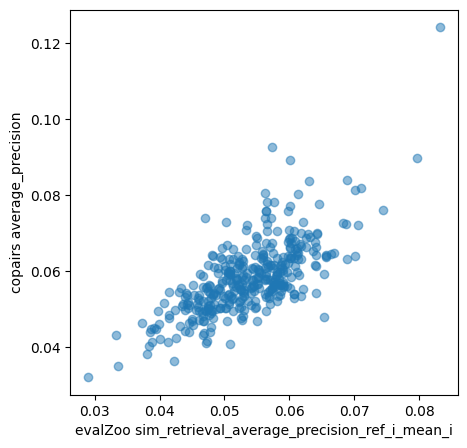

In [ ]:


# plot sim_retrieval_average_precision_ref_i_mean_i vs. average_precision
plt.figure(figsize=(5,5))
plt.scatter(
    metrics.sim_retrieval_average_precision_ref_i_mean_i,
    metrics.average_precision,
    alpha=0.5
)
plt.xlabel("evalZoo sim_retrieval_average_precision_ref_i_mean_i")
plt.ylabel("copairs average_precision")
plt.show()


In [ ]:
metrics_df = pd.concat([
    evalzoo_results[["sim_retrieval_average_precision_ref_i_mean_i", "package"]], 
    agg_result_trt[["average_precision", "package"]]
    ])

In [ ]:
# plot seaborn sctterplot with hue

g = sns.scatterplot(
    data=metrics_df,
    x="sim_retrieval_average_precision_ref_i_mean_i",
    y="average_precision",
    hue="package",
    )
g.set_axis_labels("evalZoo sim_retrieval_average_precision_ref_i_mean_i", "copairs average_precision")
plt.show()


NameError: name 'metrics_df' is not defined

In [55]:
result["package"] = "copairs"
result["p_value"] = -np.log10(result["p_value"])
copairs_h13 = result.loc[(result["Metadata_JCP2022"]=="JCP2022_900041") & (result["Metadata_Well"]=="H13"), ["average_precision", "p_value", "package"]]

In [56]:
result

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_pert_type,Metadata_Source_x,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_Source_y,p_value,average_precision,package
0,JCP2022_900006,ccsbBroad304_00008,ORF000425.1_TRC304.1,pLX_304,NM_001095.4,ASIC1,41,9606,acid sensing ion channel subunit 1,100.0,1584.0,trt,source_4,BR00126538,B21,OAB37.38.39.40.A,source_4,4.000043,NaN,copairs
1,JCP2022_900176,ccsbBroad304_00189,ORF011559.1_TRC304.1,pLX_304,NM_000587.4,C7,730,9606,complement C7,100.0,2529.0,trt,source_4,BR00126538,I15,OAB37.38.39.40.A,source_4,4.000043,NaN,copairs
2,JCP2022_900198,ccsbBroad304_00212,ORF000189.1_TRC304.1,pLX_304,NM_001745.4,CAMLG,819,9606,calcium modulating ligand,100.0,888.0,trt,source_4,BR00126538,K21,OAB37.38.39.40.A,source_4,4.000043,NaN,copairs
3,JCP2022_900294,ccsbBroad304_00321,ORF012872.1_TRC304.1,pLX_304,NM_001830.4,CLCN4,1183,9606,chloride voltage-gated channel 4,100.0,2280.0,trt,source_4,BR00126538,L17,OAB37.38.39.40.A,source_4,4.000043,NaN,copairs
4,JCP2022_900295,ccsbBroad304_00322,ORF012041.1_TRC304.1,pLX_304,NM_000084.5,CLCN5,1184,9606,chloride voltage-gated channel 5,100.0,2238.0,trt,source_4,BR00126538,L20,OAB37.38.39.40.A,source_4,4.000043,NaN,copairs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,JCP2022_915130,ccsbBroad304_99991,ORFC00003.1_TRC304.1,pLX_304,promegaLuc.1,LUCIFERASE,LUCIFERASE,CONTROL,promegaLuc,100.0,1650.0,negcon,source_4,BR00123791,M12,OAB41.OAC17.OAB78.79.A,source_4,0.532435,0.012512,copairs
19139,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon,source_4,BR00123791,F17,OAB41.OAC17.OAB78.79.A,source_4,0.056104,0.010801,copairs
19140,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon,source_4,BR00123791,I10,OAB41.OAC17.OAB78.79.A,source_4,0.244779,0.011816,copairs
19141,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon,source_4,BR00123791,K09,OAB41.OAC17.OAB78.79.A,source_4,1.060025,0.013582,copairs


In [59]:
evalzoo_l1_0["package"] = "evalzoo"
evalzoo_l1_0.rename(columns={
    "sim_retrieval_average_precision_ref_i": "average_precision",
    "sim_retrieval_average_precision_ref_i_nlog10pvalue": "p_value",
    }, inplace=True)
evalzoo_h13 = evalzoo_l1_0.loc[(evalzoo_l1_0.Metadata_JCP2022 == "JCP2022_900041") & (evalzoo_l1_0.Metadata_Well == "H13"), ["average_precision", "p_value", "package"]]

AttributeError: 'Axes' object has no attribute 'set_axis_labels'

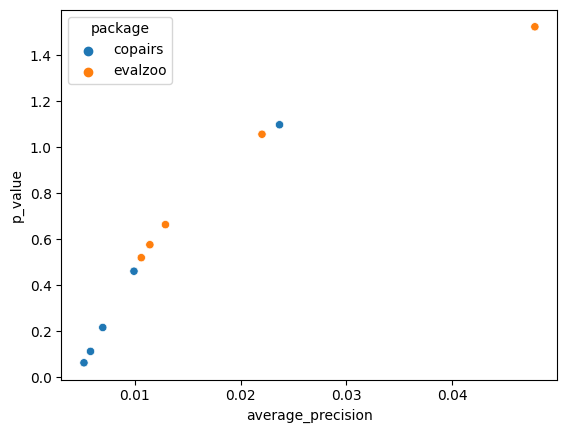

In [62]:
h13 = pd.concat([copairs_h13, evalzoo_h13], axis=0)

#seaborn scatterplot
g = sns.scatterplot(
    data=h13,
    x="average_precision",
    y="p_value",
    hue="package",
    )
g.set_axis_labels("average_precision", "-log10(p_value)")
plt.show()

